References

My Statistics learning notebook following the live lesson series [**"Probability and Statistics for Machine Learning"**](https://learning.oreilly.com/videos/probability-and-statistics/9780137566273/) by Dr. Jon Krohn. I adapted some and partially modified or added entirely new code. Notes largely based on and from Jon's notebooks and learning materials. The lesson and original notebook source code at:

https://learning.oreilly.com/videos/probability-and-statistics/9780137566273/
https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/4-calculus-ii.ipynb

## Sticky Notes for Thoughts

In [ ]:
# display work
notes = ["",
         "",
         "",
         ""]

sticky_notes(notes)

# 10.1 Independent versus Dependent Variables

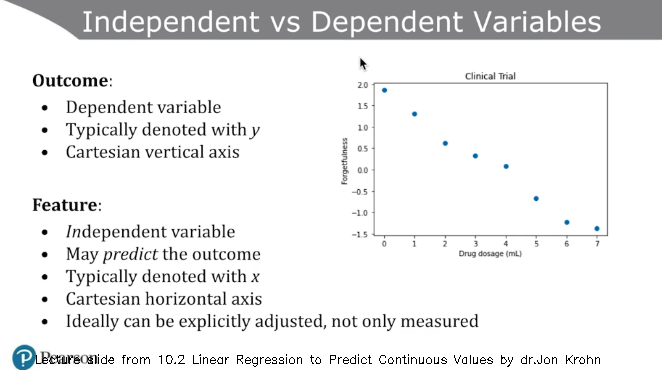

In [14]:
path = "/content/here/MyDrive/Math works/STAT10/image-20210921142203676.png"
show_img(path, resize=.65, source="Lecture slide from 10.2 Linear Regression to Predict Continuous Values by dr.Jon Krohn", 
         source_scale=0.4)

# 10.2 Linear Regression to Predict Continuous Values

- y-intercept: the starting value for your outcomes. 
  - For instance, if you are predicting house prices, you want the predicted house price to start at a certain level, namely the y-intercept, otherwise your house price will be 0 and you don't want that :P !
- Parameters (independent variables):
  - $a$ : $y-intercept$
  - $b$ : distance to school
  - $c$ : number of bedrooms
  - ...
  - m features
- vector of learned model parameters (re-adjusted through training)
- outcome (dependent variables)



# 10.3 Fitting a Line to Points on a Cartesian Plane


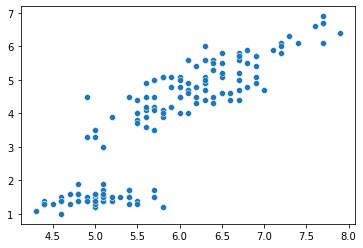

In [20]:
iris = sb.load_dataset('iris')
x = iris.sepal_length.to_numpy()
y = iris.petal_length.to_numpy()

_ = sb.scatterplot(x=x, y=y)

Consider fitting a line to points on a Cartesian plane (2-D surface, with $y$-axis perpendicular to horizontal $x$-axis). To fit such a line, the only parameters we require are a $y$-intercept (say, $\beta_0$) and a slope (say, $\beta_1$):
$$ y = \beta_0 + \beta_1 x $$

This corresponds to the case where we have a single feature (a single predictor variable, $x$) in a regression model:
$$ y = \beta_0 + \beta_1 x + \epsilon $$

- $\epsilon$ (error): a measure of the difference between the true $y_i$ and the model's estimate $\hat y_i$
- Perfect prediction of $y_i$, then $\epsilon_i = 0$.

Our objective:
- to find the parameters such that
- $\beta_0$ - $\beta_1$ = minimal $\epsilon$
- across all the available data points.

In the case of a model with a single predictor $x$, there is a fairly straightforward linear least squares formula we can use to estimate $\beta_1$: 

$$ \hat{\beta}_1 = \frac{\text{cov}(x,y)}{\sigma^2_x} $$

$$ \text{predicted value 1} = \frac{\text{covariance of }x \text{ and }y}{\text{variance of }x} $$

(We'll dig further into the "least squares" concept in the next section, for now we can think of it as minimizing the squared error $(\hat{y}_i - y_i)^2$, which we isolate from $\text{cov}(x,y)$ via division by $\sigma^2_x$)


### Regression Example 1 - iris

In [21]:
n = len(x)
xbar = sum(x)/n
ybar = sum(y)/n

product = []
for i in range(n):
    product.append((x[i]-xbar)*(y[i]-ybar))

cov = sum(product)/n
cov

1.2658199999999995

In [22]:
beta1 = cov/np.var(x)
beta1

1.8584329782548399

With $\hat{\beta}_1$ in hand, we can then rearrange the line equation ($y = \beta_0 + \beta_1 x$) to estimate $\beta_0$: 

$$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} $$

In [23]:
beta0 = ybar - beta1*xbar 
beta0

-7.101443369602448

In [24]:
xline = np.linspace(4, 8, 1000)
yline = beta0 + beta1*xline

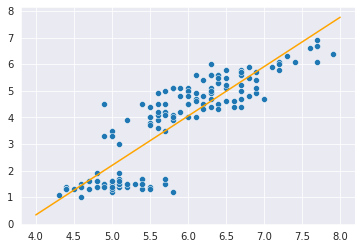

In [36]:
sb.set_style('darkgrid')     # white, dark, whitegrid, darkgrid, ticks
sb.scatterplot(x=x, y=y)
_ = plt.plot(xline, yline, color='orange')

In [37]:
x_i = 5.5
y_i = beta0 + beta1 * x_i
y_i

3.1199380107991708

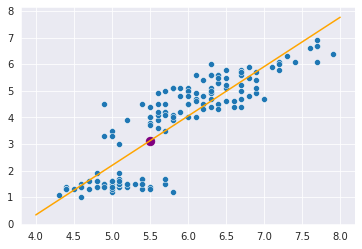

In [43]:
sb.scatterplot(x=x, y=y)
plt.plot(xline, yline, color='orange')
_ = plt.scatter(x_i, y_i, marker='o', color='purple', s=70)

### Regression Example 2 - Alzheimer's disease

In [44]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7.])
y = np.array([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

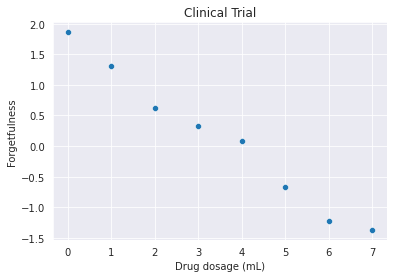

In [45]:
sb.scatterplot(x=x, y=y)
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
_ = plt.ylabel("Forgetfulness")

In [54]:
cov_mat = np.cov(x, y)
cov_mat

# [variance of x,  covariance x-y]
# [covariance x-y, variance of y ]

array([[ 6.        , -2.81571429],
       [-2.81571429,  1.34362143]])

In [55]:
beta1 = cov_mat[0,1]/cov_mat[0,0]
beta1   # slope of our regression line. See the plot above.

-0.4692857142857143

In [56]:
beta0 = y.mean() - beta1*x.mean()
beta0

1.76

In [57]:
xline = np.linspace(0, 7, 1000)
yline = beta0 + beta1 * xline

In [58]:
x_i = 4.5
y_i = beta0 + beta1 * x_i
y_i

-0.35178571428571437

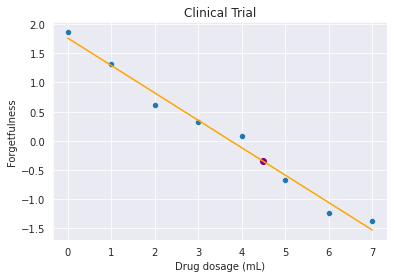

In [59]:
sb.scatterplot(x=x, y=y)
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
plt.ylabel("Forgetfulness")
plt.plot(xline, yline, color='orange')
_ = plt.scatter(x_i, y_i, marker='o', color='purple')

# 10.4 Linear Least Squares Exercise



# 10.5 Ordinary Least Squares



# 10.6 Categorical "Dummy" Features



# 10.7 Logistic Regression to Predict Categories

# 10.8 Open-Ended Exercises

# Important Functions
- ``
  - ``
- ``
  - ``
- ``
  - ``
- ``
  - ``

# Error Notes 
- ``
  - ``
- ``
  - ``
- ``
  - ``
- ``
  - ``

## Basic Setup

In [19]:
import math
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import cv2
from IPython.display import HTML, display
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('here')

def set_css():
  display(HTML('''<style> pre { white-space: pre-wrap; } </style>'''))
get_ipython().events.register('pre_run_cell', set_css)

# Shows the image immediately. 
# Resize option available.
# If you are using others' image, you can pass in a string parameter to cite the source.
def show_img(path, resize=None, source=None, source_scale=0.5):
    img = cv2.imread(path)
    if (resize != None):
        img = cv2.resize(img, dsize=(0,0), fx=resize, fy=resize)
    if(source != None):
        cite_source(img, source, scale=source_scale)
    cv2_imshow(img)

# Turns the path into an image object. Resize option available.
def get_img(path, resize=None):
  img = cv2.imread(path)
  if (resize != None):
    img = cv2.resize(img, dsize=(0,0), fx=resize, fy=resize)
  return img

# Puts text of source on the image.
# Avoiding plagiarism and crediting others' hard work is important.
def cite_source(img, source, org=None, scale=0.7, color=1):
    if (org == None):
        img = cv2.putText(img, source, org=(int(np.ceil(img.shape[1]*0.05)), int(np.ceil(img.shape[0]*0.98))),
                          fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=scale, color=1)
    elif (org != None):
        img = cv2.putText(img, source, org=org,
                          fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=scale, color=1)
    return img

# Take notes on a sticky note.
def take_notes(img, source, org, scale=None, color=1, thickness=1):
    if (org == None):
        img = cv2.putText(img, source, org=( int(np.ceil( img.shape[1] * 0.9 )), int(np.ceil( img.shape[0] * 0.1 )) ),
                          fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=scale, color=color, thickness=thickness)
    elif (org != None):
        img = cv2.putText(img, source, org=( int(np.ceil( img.shape[1] * org[0] )), int(np.ceil( img.shape[0] * org[1] )) ),
                          fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=scale, color=color, thickness=thickness)
    return img

def sticky_notes(notes, return_object=False):
    path = "/content/here/MyDrive/Math works/notes.png"    
    sticky_notes = get_img(path, resize=0.65)

    for i, note in enumerate(notes):
        sticky_notes = take_notes(sticky_notes, note, org=(1/17,(i+4)/11), scale=0.5)
    if (return_object == True):
        return sticky_notes
    else:
        cv2_imshow(sticky_notes)

# Code by Bill Grates on Stackoverflow
# https://stackoverflow.com/users/5629538/bill-grates
# https://stackoverflow.com/questions/32609098/how-to-fast-change-image-brightness-with-python-opencv

def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value
    
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

Drive already mounted at here; to attempt to forcibly remount, call drive.mount("here", force_remount=True).
